<a href="https://colab.research.google.com/github/mobarakol/Robustness_Stress_Testing/blob/main/pertubration_figure.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import gdown
url = 'https://drive.google.com/uc?id=15k3At6E7qk_FrEDrEuhSBl2jmXP5RVvj'
gdown.download(url,'sample_0.jpg',quiet=True)

'sample_0.jpg'

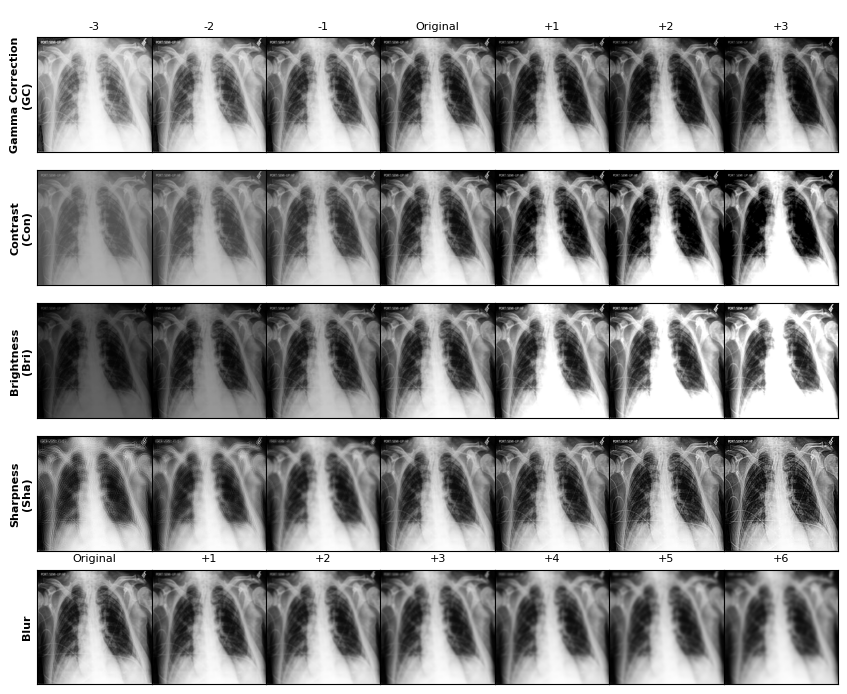

In [ ]:
from skimage import exposure
from skimage.filters import gaussian
from PIL import Image, ImageEnhance, ImageFilter
import cv2
import matplotlib.pyplot as plt
import numpy as np
import torchvision.transforms.functional as TF

class perturbation_class:

    def gamma_correction(img):
        seq = []
        gammas = [0.4, 0.6, 0.8, 1, 1.2, 1.4, 1.6]#np.arange(1,0.1,-.03)
        img = Image.fromarray(img)
        for i in range(len(gammas)):
            z = TF.adjust_gamma(img, gammas[i], gain=1)
            seq.append(z)
        return seq

    def contrast(img):
        seq = []
        factors = [0.4, 0.6, 0.8, 1, 1.2, 1.4, 1.6]
        img = Image.fromarray(img)
        for i in range(len(factors)):
            z = TF.adjust_contrast(img, factors[i])
            seq.append(z)
        return seq

    def brightness(img):
        seq = []
        factors = [0.4, 0.6, 0.8, 1, 1.2, 1.4, 1.6]
        img = Image.fromarray(img)
        for i in range(len(factors)):
            z = TF.adjust_brightness(img, factors[i])
            seq.append(z)
        return seq

    def sharpness(img):
        seq = []
        #factors = [0.4, 0.6, 0.8, 1, 1.2, 1.4, 1.6]
        factors = [ -6, -4, -2, 1, 2, 4, 6]
        img = Image.fromarray(img)
        for i in range(len(factors)):
            z = TF.adjust_sharpness(img, factors[i])
            seq.append(z)
        return seq

    def gaussian_blur(img):
        seq = []
        ksize = [1, 3, 5, 7, 9, 11, 13]
        img = Image.fromarray(img)
        for i in range(len(ksize)):
            z = TF.gaussian_blur(img, kernel_size=ksize[i])
            seq.append(np.array(z))
        return seq

img_dir = 'sample_0.jpg'
original = cv2.imread(img_dir)
plt.rcParams.update({'font.size': 14})
# perturbation_all = ['brightness', 'contrast','gamma_correction','sharpness','gaussian_blur']
# filter_name = ['Brightness', 'Contrast','Gamma Correction','Sharpness','Gaussian blur']
ptech_list = ['Original', '+1', '+2', '+3', '+4', '+5', '+6']
f_size = 8
perturbation_all = ['gamma_correction', 'contrast', 'brightness', 'sharpness','gaussian_blur']
#filter_name = ['Gamma Correction (GC)', 'Contrast (Con)', 'Brightness (Bri)', 'Sharpness (Sha)','Blur']

filter_name = ['Gamma Correction\n(GC)', 'Contrast\n(Con)', 'Brightness\n(Bri)', 'Sharpness\n(Sha)','Blur']
seq_all = [0, 1, 2, 3, 4, 5, 6]
levels = ['-3','-2','-1','Original','+1','+2','+3']
levels_real = [0.4, 0.6, 0.8, 1, 1.2, 1.4, 1.6]
fig_per_row = len(seq_all)
fig, ax = plt.subplots(len(perturbation_all), fig_per_row, figsize=(31/3, 25.5/3), gridspec_kw=dict(wspace=0.00, hspace=0.09))
for p_idx, per in enumerate(perturbation_all):
    class_method = getattr(perturbation_class, per)
    seq = class_method(original)
    for idx, seq_idx in enumerate(seq_all):
        if p_idx == 4:
            ax[p_idx, idx].set_title('{}'.format(ptech_list[idx]), fontsize=f_size)
        if idx == 3:
            ax[p_idx, idx].imshow(seq[seq_idx], cmap='gray')
        else:
            ax[p_idx, idx].imshow(seq[seq_idx], cmap='gray')

        if p_idx == 0:
            if levels[idx] == 'Original':
                ax[p_idx, idx].set_title('\n{}'.format(levels[idx]), fontsize=f_size)
            else:
                ax[p_idx, idx].set_title('{}'.format(levels[idx], levels_real[idx]), fontsize=f_size)
        if idx == 0:
            ax[p_idx, idx].set_ylabel(filter_name[p_idx], fontsize=f_size, fontweight="bold")

        ax[p_idx, idx].xaxis.set_major_locator(plt.NullLocator())
        ax[p_idx, idx].yaxis.set_major_locator(plt.NullLocator())


fig.show()
plt.savefig('perturbation_effect_v2.pdf',dpi=100)

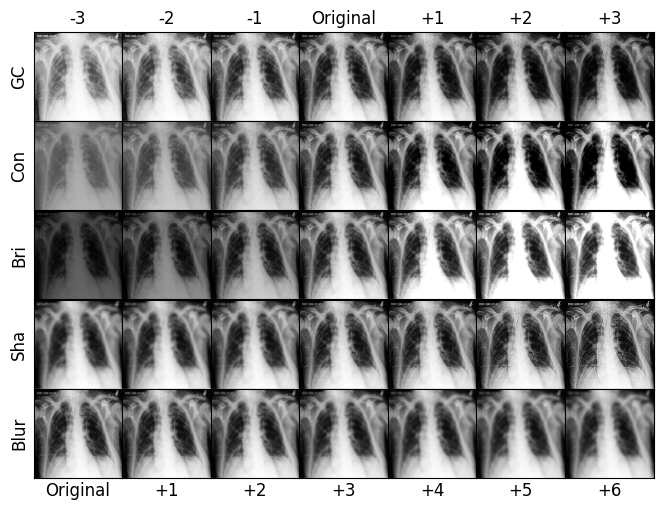

In [ ]:
import matplotlib.gridspec as gridspec

img_dir = 'sample_0.jpg'
original = cv2.imread(img_dir)
plt.rcParams.update({'font.size': 18})
ptech_list = [ '-3', '-2', '-1','Original', '+1', '+2', '+3']
ptech_listb = ['Original', '+1', '+2', '+3', '+4', '+5', '+6']
f_size = 25
perturbation_all = ['gamma_correction', 'contrast', 'brightness', 'sharpness','gaussian_blur']
filter_name = ['GC', 'Con', 'Bri', 'Sha', 'Blur']
fontsize = 12
fig2 = plt.figure(figsize=(8, 6))
ncols=7; nrows=5
spec2 = gridspec.GridSpec(nrows=nrows, ncols=ncols, figure=fig2, wspace=0.0, hspace=-0.15)
for nr in range(nrows):
    class_method = getattr(perturbation_class, perturbation_all[nr])
    seq = class_method(original)
    for nc in range(ncols):
        if nr == 0:
            ax = fig2.add_subplot(spec2[nr, nc])
            ax.set_title(ptech_list[nc], fontsize = fontsize)
        elif nr == 4:
            ax = fig2.add_subplot(spec2[nr, nc])
            ax.set_title(ptech_listb[nc], y=-0.3, fontsize = fontsize)
        else:
            ax = fig2.add_subplot(spec2[nr, nc])

        if (nr != 4 and nc == 3) or (nr == 4 and nc == 0):
            ax.imshow(original)
        else:
            ax.imshow(seq[nc])
        ax.set_xticks([])
        ax.set_yticks([])
        if nc == 0:
            ax.set_ylabel(filter_name[nr], fontsize = fontsize)

fig2.savefig('perturbation_effect_v4.pdf',bbox_inches='tight', dpi=100)

In [ ]:
import gdown
url = 'https://drive.google.com/uc?id=1CIHrpLyxRrKeNu-19IjBFXhuM-6dnNuC'
gdown.download(url,'ISIC_Dataset_Fig.zip',quiet=True)
!unzip -q ISIC_Dataset_Fig.zip

'ISIC_Dataset_Fig.zip'

In [ ]:
import pandas as pd
from glob import glob

img_data_dir = 'ISIC_Dataset_Fig/'
data = pd.read_csv('ISIC_Dataset_Fig/isic_test.csv')

ISIC_Dataset_Fig/ISIC_0025917.jpeg ISIC_Dataset_Fig/ISIC_0032698.jpeg
ISIC_Dataset_Fig/ISIC_0015936.jpeg ISIC_Dataset_Fig/ISIC_0014233.jpeg
ISIC_Dataset_Fig/ISIC_9982623.jpeg ISIC_Dataset_Fig/ISIC_0065655.jpeg
ISIC_Dataset_Fig/ISIC_0000250.jpeg ISIC_Dataset_Fig/ISIC_0000159.jpeg
ISIC_Dataset_Fig/ISIC_7689821.jpeg ISIC_Dataset_Fig/ISIC_6581411.jpeg


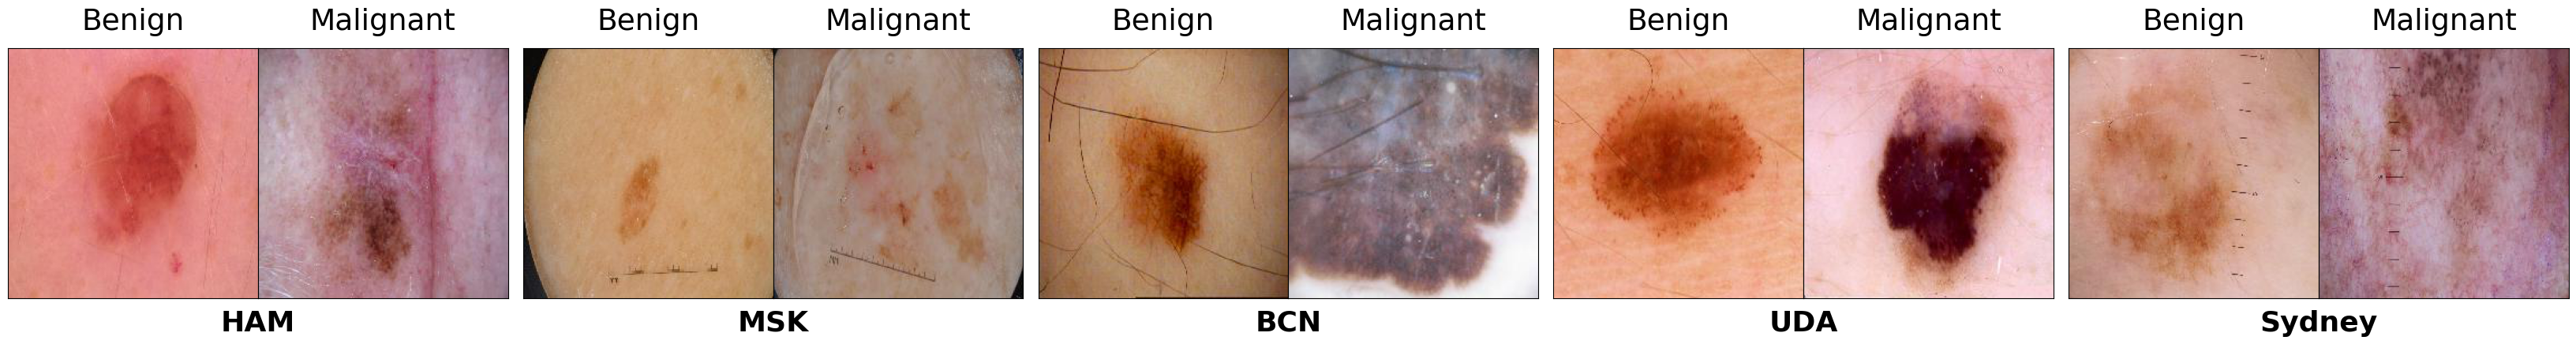

In [ ]:
domain_all = ['HAM', 'MSK', 'BCN','UDA', 'Sydney']
gw = 0
for i in range(5):
    data_d = data.loc[data["domains"] == domain_all[i]]
    ham_img_label_b = data_d.loc[data_d['benign_malignan'] == 'benign']
    ham_img_label_m = data_d.loc[data_d['benign_malignan'] == 'malignan']

    gs1 = gridspec.GridSpec(2, 2)
    gs1.update(left=0.01+gw, right=1+gw, wspace=0.00, hspace=0.0)
    ax1 = plt.subplot(gs1[:,:-1])
    ax2 = plt.subplot(gs1[:, -1])
    ax1.set_yticks([])
    ax2.set_yticks([])
    ax1.set_xticks([])
    ax2.set_xticks([])
    ax1.set_title('Benign', fontsize=27,y=1.05)
    ax2.set_title('Malignant', fontsize=27,y=1.05)
    ax1.set_xlabel(domain_all[i], x=1, labelpad=10, fontsize=26, fontweight="bold")
#     ax2.set_xlabel()
    ax1.imshow(Image.open(img_data_dir+list(ham_img_label_b['images'])[1]))
    ax2.imshow(Image.open(img_data_dir+list(ham_img_label_m['images'])[0]))
    print(img_data_dir+list(ham_img_label_b['images'])[1], img_data_dir+list(ham_img_label_m['images'])[0])
    gw += 1.02

plt.savefig("isic_dataset.pdf", bbox_inches='tight', dpi=300)

ISIC_Dataset_Fig/ISIC_0025917.jpeg ISIC_Dataset_Fig/ISIC_0032698.jpeg


<ipython-input-33-bf4565e71e9a>:25: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


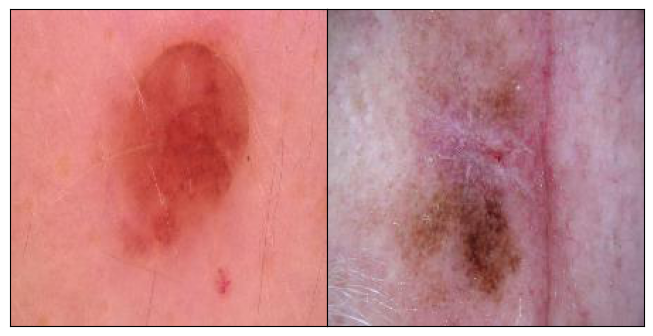

ISIC_Dataset_Fig/ISIC_0015936.jpeg ISIC_Dataset_Fig/ISIC_0014233.jpeg


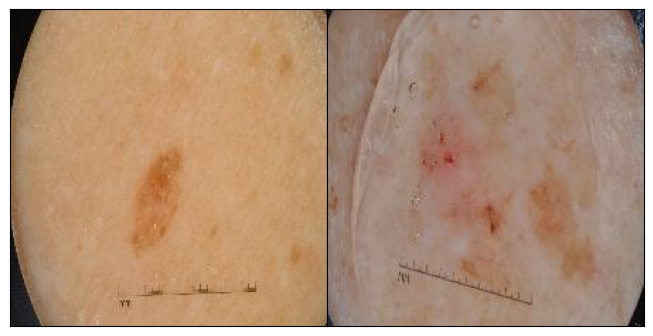

ISIC_Dataset_Fig/ISIC_9982623.jpeg ISIC_Dataset_Fig/ISIC_0065655.jpeg


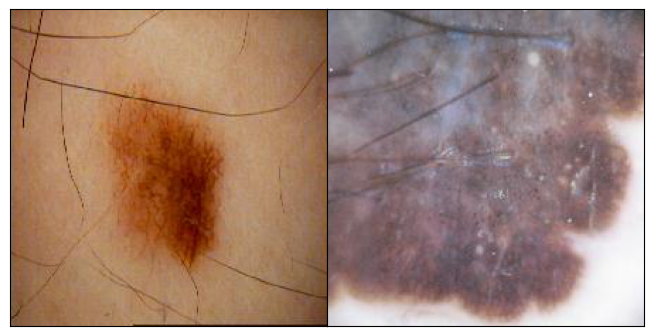

ISIC_Dataset_Fig/ISIC_0000250.jpeg ISIC_Dataset_Fig/ISIC_0000159.jpeg


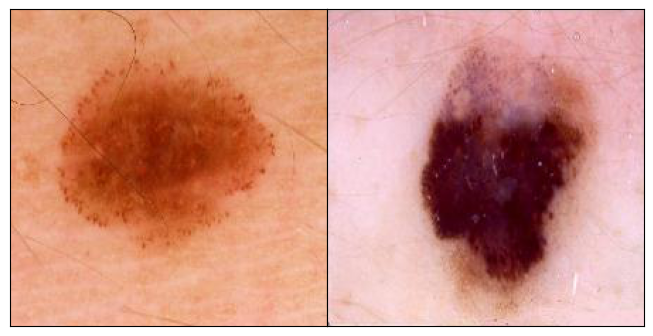

ISIC_Dataset_Fig/ISIC_7689821.jpeg ISIC_Dataset_Fig/ISIC_6581411.jpeg


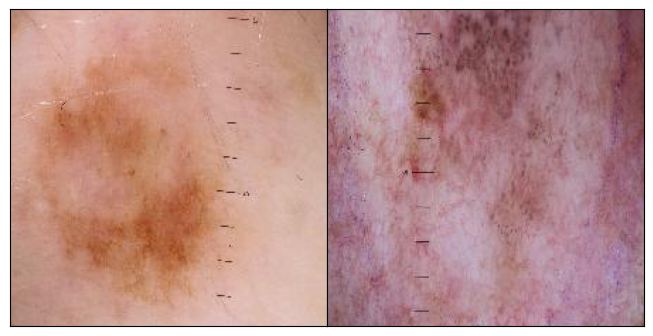

In [ ]:
# domain_all = ['HAM', 'MSK', 'BCN','UDA', 'Sydney']
domain_all = ['HAM', 'MSK', 'BCN','UDA', 'Sydney']
gw = 0
for i in range(5):
    data_d = data.loc[data["domains"] == domain_all[i]]
    ham_img_label_b = data_d.loc[data_d['benign_malignan'] == 'benign']
    ham_img_label_m = data_d.loc[data_d['benign_malignan'] == 'malignan']

    gs1 = gridspec.GridSpec(2, 2)
    gs1.update(left=0.01+gw, right=1+gw, wspace=0.00, hspace=0.0)
    ax1 = plt.subplot(gs1[:,:-1])
    ax2 = plt.subplot(gs1[:, -1])
    ax1.set_yticks([])
    ax2.set_yticks([])
    ax1.set_xticks([])
    ax2.set_xticks([])
    # ax1.set_title('Benign', fontsize=27,y=1.05)
    # ax2.set_title('Malignant', fontsize=27,y=1.05)
    # ax1.set_xlabel(domain_all[i], x=1, labelpad=10, fontsize=26, fontweight="bold")
    #     ax2.set_xlabel()
    ax1.imshow(Image.open(img_data_dir+list(ham_img_label_b['images'])[1]))
    ax2.imshow(Image.open(img_data_dir+list(ham_img_label_m['images'])[0]))
    print(img_data_dir+list(ham_img_label_b['images'])[1], img_data_dir+list(ham_img_label_m['images'])[0])
    # gw += 1.02
    plt.tight_layout()
    plt.show()
    # plt.savefig("isic_dataset.pdf", bbox_inches='tight', dpi=300)